In [194]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

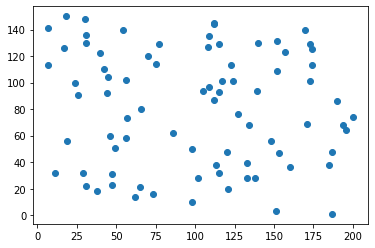

In [195]:
data = [(random.randint(0,200),random.randint(0,150)) for i in range(80)]
plt.scatter([d[0] for d in data],[d[1] for d in data])

In [196]:
def print_cluster(data,mean):
    print(mean)
    print()
    for i in range(len(mean)):
        print(f'({mean[i][0]},{mean[i][1]}) ',end=" : ")
        temp = [d for d in data if d[2]==i]
        for j in range(len(temp)):
            print(f'{temp[j][0],temp[j][1]}',end=", ")
        print()
    print('---------------------------------------------------------------------')
    print()
    print()

In [197]:
def manhattan_dis(p1,p2):
    return abs(p1[0]-p2[0])+abs(p1[1]-p2[1])

In [198]:
def difference(mean1,mean2):
    for i in range(len(mean1)):
        if abs(mean1[i][0]-mean2[i][0])>0.001 or abs(mean1[i][1]-mean2[i][1])>0.0000001 :
            return False
    
    return True

In [199]:
def modify_data(data,mean,k):
    modified_data = []
    for d in data:
        temp = [manhattan_dis(d,mean[i]) for i in range(k)]
        indx = 0
        for j in range(len(temp)):
            if temp[j]<temp[indx]:
                indx = j
        modified_data.append((d[0],d[1],indx))
    return modified_data

In [200]:
def cluster(data,mean,k):
    
    while True:
        new_mean = []
        for i in range(k):
            temp = [d for d in data if d[2]==i]
            x = sum([d[0] for d in temp])/len(temp)
            y = sum([d[1] for d in temp])/len(temp)
            new_mean.append((x,y))
        if(difference(new_mean,mean)):
            mean = new_mean
            data = modify_data(data,mean,k)
            print_cluster(data,mean)
            break
        mean = new_mean
        data = modify_data(data,mean,k)
        print_cluster(data,mean)
    
    
    
    
    return mean,data

In [201]:
#data : training set
# k : no_of_clusters
def kmean_clustering(data,k=2):
    means = []
    i = 0
    while i<k:
        choice = random.choice(data)
        if len(means)==0 or choice not in means:
            means.append(choice)
            i+=1
            
    modified_data = modify_data(data,means,k)

    print_cluster(modified_data,means)
    means,data = cluster(modified_data,means,k)
    
    return means,data

In [202]:
m,data = kmean_clustering(data,k=5)




[(70, 120), (44, 92), (151, 3), (173, 129), (153, 47)]

(70,120)  : (31, 136), (115, 129), (77, 129), (30, 148), (75, 114), (70, 120), (115, 93), (17, 126), (18, 150), (124, 101), (109, 97), (105, 94), (117, 101), (7, 141), (31, 130), (40, 122), (109, 135), (112, 144), (112, 145), (54, 140), (123, 113), (108, 127), 
(44,92)  : (26, 91), (38, 18), (47, 31), (31, 22), (49, 51), (7, 113), (57, 73), (47, 23), (29, 32), (112, 87), (56, 58), (66, 80), (65, 21), (44, 92), (45, 104), (56, 102), (86, 62), (42, 110), (46, 60), (19, 56), (11, 32), (62, 14), (24, 100), 
(151,3)  : (187, 1), (151, 3), (98, 10), (121, 20), (73, 16), 
(173,129)  : (152, 109), (173, 129), (174, 125), (174, 113), (140, 130), (170, 140), (152, 131), (190, 86), (157, 123), (173, 101), 
(153,47)  : (196, 64), (138, 28), (127, 76), (171, 69), (133, 28), (98, 50), (153, 47), (133, 39), (200, 74), (185, 38), (160, 36), (115, 32), (194, 68), (120, 48), (148, 56), (139, 94), (187, 48), (102, 28), (134, 68), (113, 38), 
-------

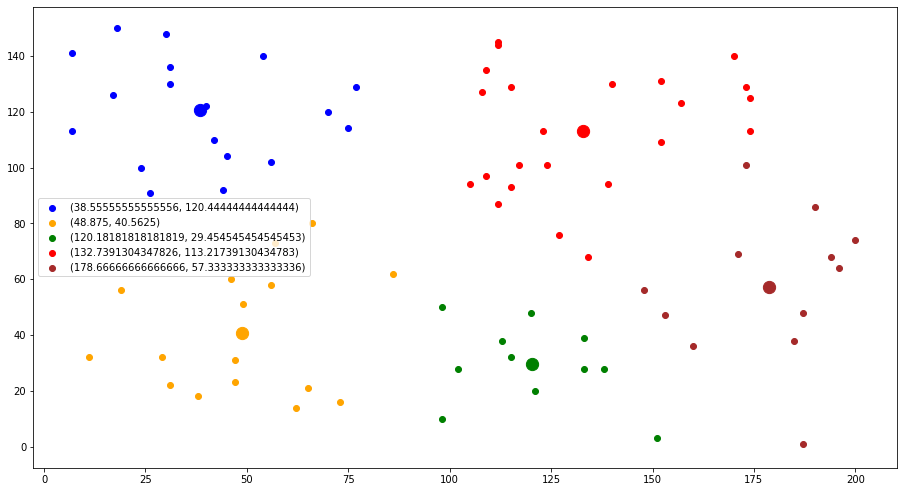

In [205]:
color = ['blue','orange','green','red','brown','grey','olive','cyan','navy','yellow']
#predicting clusters for new input
fig= plt.figure(figsize=(15,8))
axes= fig.add_axes([0.4,0.4,.8,.8])
for i in range(len(m)):
    temp = [d for d in data if d[2]==i]
    axes.scatter([d[0] for d in temp],[d[1] for d in temp],color=color[i%len(color)],label=str(m[i]))
    axes.scatter(m[i][0],m[i][1],s=150,color=color[i%len(color)])
plt.legend()